# Баринов Роман Олегович #
## Лабораторная работа №1 ##
## Вариант 2 ##
### Отмена рейсов ###

In [1]:
import pandas as pd
import numpy
from scipy import stats
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
Fly_data = pd.read_csv("flights.csv", nrows=500000)


### 1. Подсчитайте количество отменённых рейсов.###

In [2]:
print(Fly_data.groupby('CANCELLED')['FLIGHT_NUMBER'].count())

CANCELLED
0    483176
1     16824
Name: FLIGHT_NUMBER, dtype: int64


### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.###

In [3]:
Fly_data['CANCELLED'].idxmax()

32

In [4]:
Fly_data.loc[[32],'ORIGIN_AIRPORT']

32    ANC
Name: ORIGIN_AIRPORT, dtype: object

### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.###

In [5]:
Fly_data['CANCELLED'].corr(Fly_data['DAY'])

-0.038815592965758865

In [6]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['DAY'])

SpearmanrResult(correlation=-0.043267542936422446, pvalue=9.2814652601887258e-206)

Если предположить, что отмена рейсов и дни никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=9.2814652601887258e-206

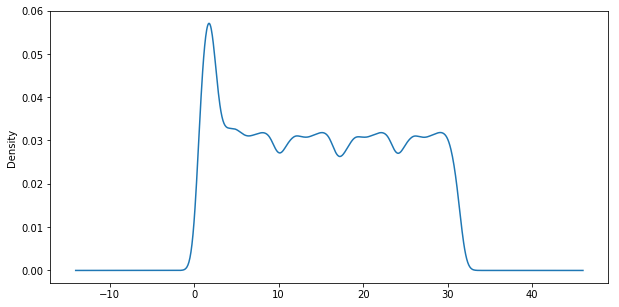

In [69]:
s = pd.Series(Fly_data['DAY'])
s.plot.kde()

In [10]:
Fly_data['CANCELLED'].corr(Fly_data['MONTH'])

0.17885181785805246

In [45]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['MONTH'])

SpearmanrResult(correlation=0.17885181785805146, pvalue=0.0)

Если предположить, что отмена рейсов и месяцы никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=0.0

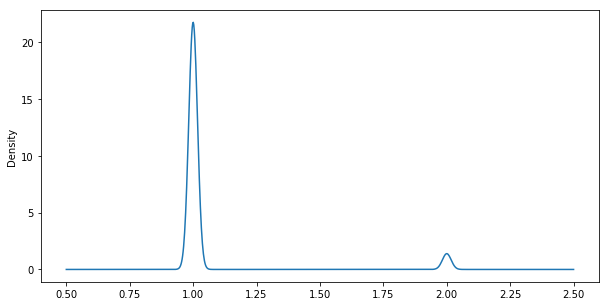

In [74]:
s = pd.Series(Fly_data['MONTH'])
s.plot.kde()

In [49]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['AIRLINE'])

c:\users\barin\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.0054718462429232699, pvalue=0.00010919355041078163)

Если предположить, что отмена рейсов и авиакомпании никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=0.00010919355041078163

In [47]:
stats.spearmanr(Fly_data['CANCELLED'],Fly_data['ORIGIN_AIRPORT'])

c:\users\barin\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.0037055248952018861, pvalue=0.0087877123100103798)

Если предположить, что отмена рейсов и аэропорты никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue=0.0087877123100103798

### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.###

In [7]:
Fly_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

#### Для 'AA' Airline ####

In [8]:
Fly_data[(Fly_data.AIRLINE == 'AA')&
         (Fly_data.DIVERTED == 1)].shape

(110, 31)

In [9]:
Fly_data[(Fly_data.AIRLINE == 'AA')&
         (Fly_data.CANCELLED == 0)].shape

(45626, 31)

In [10]:
Fly_data[(Fly_data.AIRLINE == 'AA')&
         (Fly_data.CANCELLED == 1)].shape

(1324, 31)

#### Для 'AS' Airline ####

In [11]:
Fly_data[(Fly_data.AIRLINE == 'AS')&
         (Fly_data.DIVERTED == 1)].shape

(46, 31)

In [12]:
Fly_data[(Fly_data.AIRLINE == 'AS')&
         (Fly_data.CANCELLED == 0)].shape

(14066, 31)

In [13]:
Fly_data[(Fly_data.AIRLINE == 'AS')&
         (Fly_data.CANCELLED == 1)].shape

(83, 31)

#### Для 'US' Airline ####

In [14]:
Fly_data[(Fly_data.AIRLINE == 'US')&
         (Fly_data.DIVERTED == 1)].shape

(73, 31)

In [15]:
Fly_data[(Fly_data.AIRLINE == 'US')&
           (Fly_data.CANCELLED == 0)].shape

(34323, 31)

In [16]:
Fly_data[(Fly_data.AIRLINE == 'US')&
           (Fly_data.CANCELLED == 1)].shape

(1268, 31)

### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний. ###

In [7]:
Fly_data['SPEED_FLY'] = Fly_data['DISTANCE'] /  (Fly_data['AIR_TIME']/60)
Fly_data

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
1       2015      1    1            4      AA           2336      N3KUAA   
2       2015      1    1            4      US            840      N171US   
3       2015      1    1            4      AA            258      N3HYAA   
4       2015      1    1            4      AS            135      N527AS   
5       2015      1    1            4      DL            806      N3730B   
6       2015      1    1            4      NK            612      N635NK   
7       2015      1    1            4      US           2013      N584UW   
8       2015      1    1            4      AA           1112      N3LAAA   
9       2015      1    1            4      DL           1173      N826DN   
10      2015      1    1            4      DL           2336      N958DN   
11      2015      1    1            4      AA           1674      N853AA   
12      2015      1    1            4      DL           1434      N547US   
13      2015      1    1            4      DL           2324      N3751B   
14      2015      1    1            4      DL           2440      N651DL   
15      2015      1    1            4      AS            108      N309AS   
16      2015      1    1            4      DL           1560      N3743H   
17      2015      1    1            4      UA           1197      N78448   
18      2015      1    1            4      AS            122      N413AS   
19      2015      1    1            4      DL           1670      N806DN   
20      2015      1    1            4      NK            520      N525NK   
21      2015      1    1            4      AA            371      N3GXAA   
22      2015      1    1            4      NK            214      N632NK   
23      2015      1    1            4      AA            115      N3CTAA   
24      2015      1    1            4      DL           1450      N671DN   
25      2015      1    1            4      UA           1545      N76517   
26      2015      1    1            4      AS            130      N457AS   
27      2015      1    1            4      NK            597      N528NK   
28      2015      1    1            4      US            413      N571UW   
29      2015      1    1            4      AA           2392      N3HRAA   
...      ...    ...  ...          ...     ...            ...         ...   
499970  2015      2    3            2      EV           4393      N14960   
499971  2015      2    3            2      UA            520      N439UA   
499972  2015      2    3            2      UA           1457      N57852   
499973  2015      2    3            2      MQ           3328      N616MQ   
499974  2015      2    3            2      AA           1125      N4YTAA   
499975  2015      2    3            2      AA           1165      N3CJAA   
499976  2015      2    3            2      AA           1686      N564AA   
499977  2015      2    3            2      AS            320      N778AS   
499978  2015      2    3            2      AS            602      N302AS   
499979  2015      2    3            2      B6           1434      N638JB   
499980  2015      2    3            2      B6           2807      N231JB   
499981  2015      2    3            2      DL            421      N389DA   
499982  2015      2    3            2      DL           2197      N918DH   
499983  2015      2    3            2      DL           2416      N315US   
499984  2015      2    3            2      AA            375      N505AA   
499985  2015      2    3            2      DL           1065      N911DL   
499986  2015      2    3            2      DL           1238      N353NB   
499987  2015      2    3            2      UA            415      N546UA   
499988  2015      2    3            2      UA            212      N510UA   
499989  2015      2    3            2      US            668      N152UW   
499990  2015      2    3            2      US           

#### Для 'AA' Airline ####

In [18]:
Fly_data.groupby(Fly_data.AIRLINE  =='AA')['SPEED_FLY'].mean()

AIRLINE
False    399.992722
True     430.682638
Name: SPEED_FLY, dtype: float64

#### Для 'NK' Airline ####

In [19]:
Fly_data.groupby(Fly_data.AIRLINE  =='NK')['SPEED_FLY'].mean()

AIRLINE
False    402.275495
True     434.672737
Name: SPEED_FLY, dtype: float64

#### Для 'DL' Airline ####

In [20]:
Fly_data.groupby(Fly_data.AIRLINE  =='DL')['SPEED_FLY'].mean()

AIRLINE
False    400.616678
True     416.849472
Name: SPEED_FLY, dtype: float64

### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).###

#### Для 'LAX' ORIGIN_AIRPORT ####

In [21]:
Fly_data[(Fly_data.ORIGIN_AIRPORT == 'LAX')&
         (Fly_data.CANCELLED == 1)].shape

(316, 32)

In [22]:
cancelled_Fly_data = Fly_data[['DAY']+['CANCELLED']+['ORIGIN_AIRPORT']]

In [23]:
cancelled_Fly_data.head(3)

DAY  CANCELLED ORIGIN_AIRPORT
0    1          0            ANC
1    1          0            LAX
2    1          0            SFO

In [24]:
f5 = cancelled_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'LAX') & (Fly_data['CANCELLED'] == 1)]

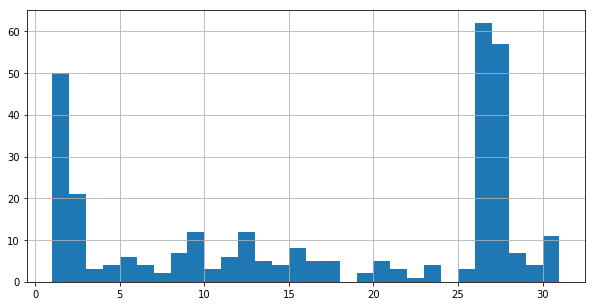

In [36]:
f5.DAY.hist(bins=30)

#### Для 'SEA' ORIGIN_AIRPORT ####

In [28]:
Fly_data[(Fly_data.ORIGIN_AIRPORT == 'SEA')&
         (Fly_data.CANCELLED == 1)].shape

(74, 32)

In [29]:
f6 = cancelled_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'SEA') & (Fly_data['CANCELLED'] == 1)]

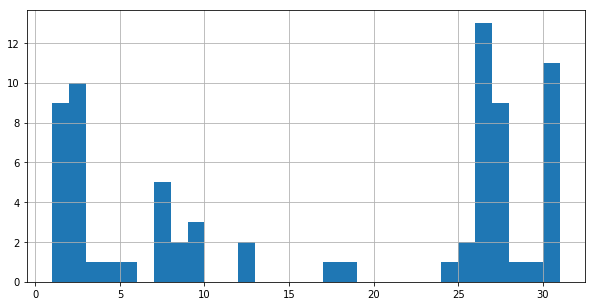

In [37]:
f6.DAY.hist(bins=30)

### 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.###

#### Время задержки отправки рейсов ####

In [38]:
delay_Fly_data = Fly_data[['ARRIVAL_DELAY']+['DEPARTURE_DELAY']+['ORIGIN_AIRPORT']+['DAY']]

In [39]:
f7 = delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'LAX')]

In [40]:
f7 = f7.dropna()

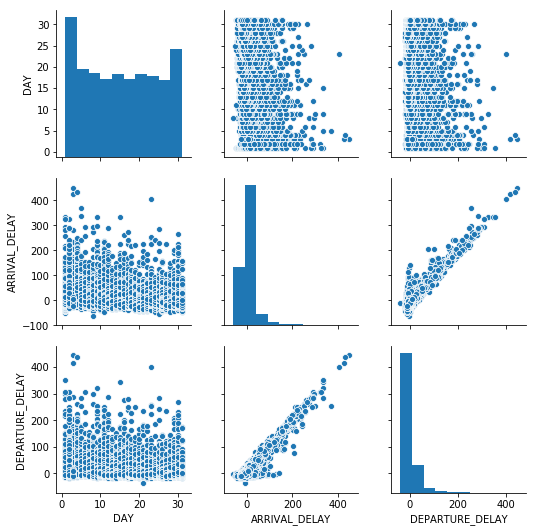

In [41]:
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(f7[cols])

In [42]:
f8 = delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'SEA')]

In [43]:
f8 = f8.dropna()

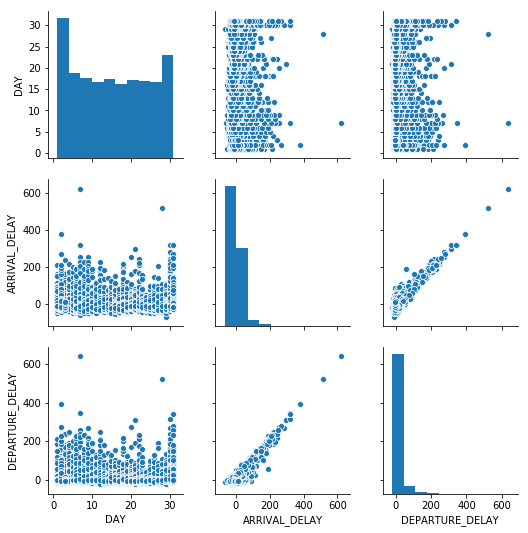

In [44]:
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(f8[cols])

In [45]:
f9 = delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'ANC')]

In [46]:
f9 = f9.dropna()

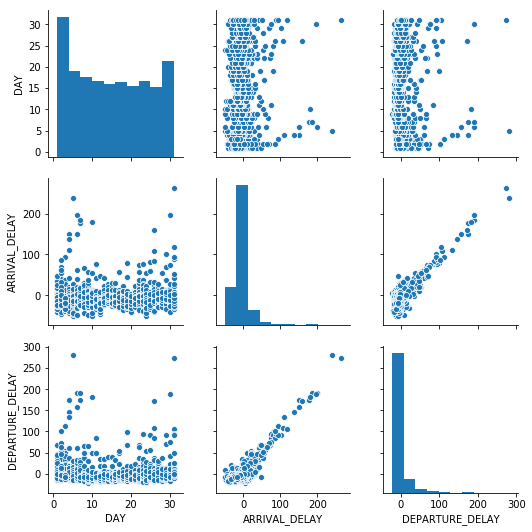

In [47]:
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(f9[cols])

### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине. ###

In [48]:
F_delay_Fly_data = Fly_data[['DAY']+['AIR_SYSTEM_DELAY']+['SECURITY_DELAY']+['ORIGIN_AIRPORT']+['AIRLINE_DELAY']+['LATE_AIRCRAFT_DELAY']+['WEATHER_DELAY']]

In [49]:
f10 = F_delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'LAX')]

In [50]:
f10= f10.dropna()

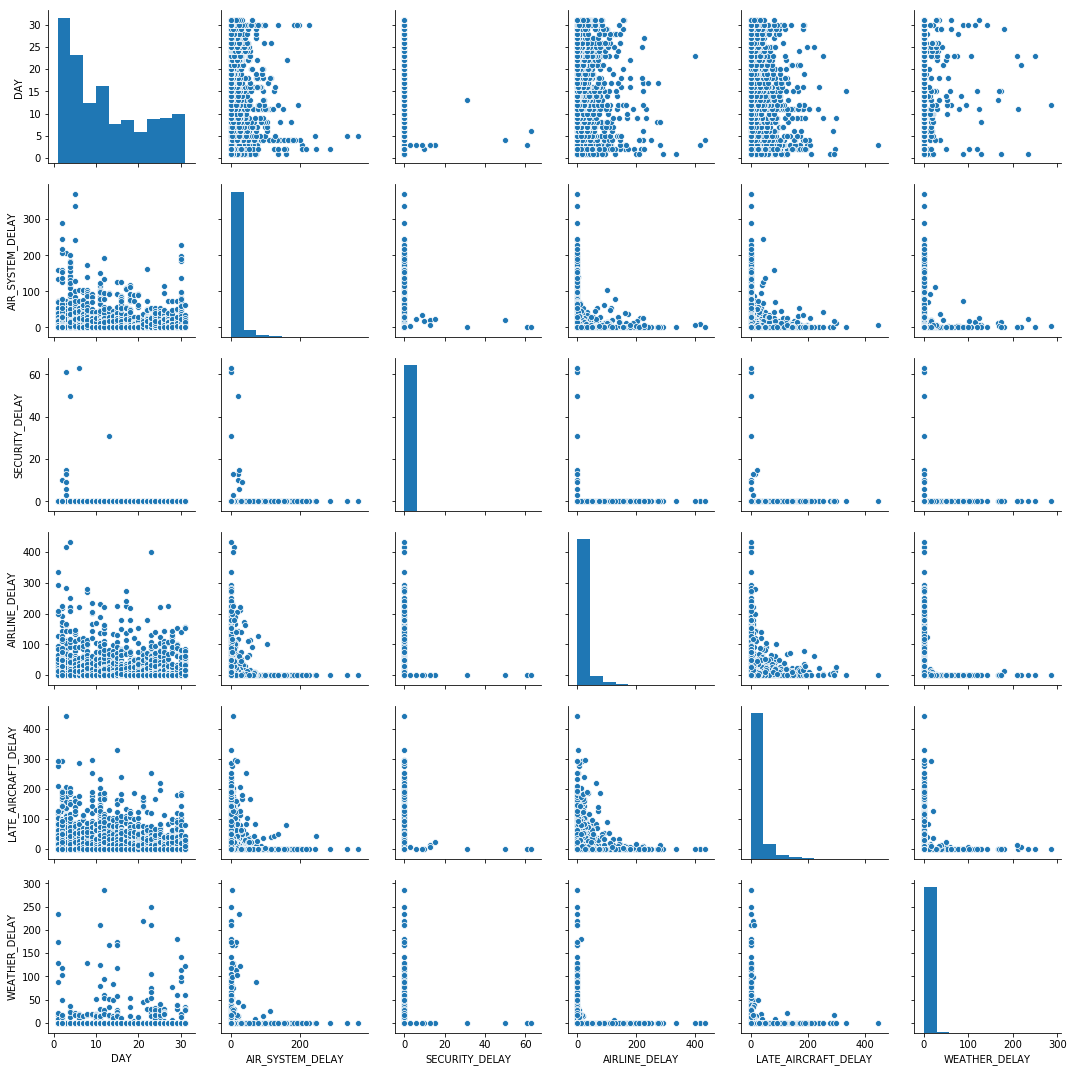

In [51]:
cols = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(f10[cols])

In [52]:
f11 = F_delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'SEA')]

In [53]:
f11= f11.dropna()

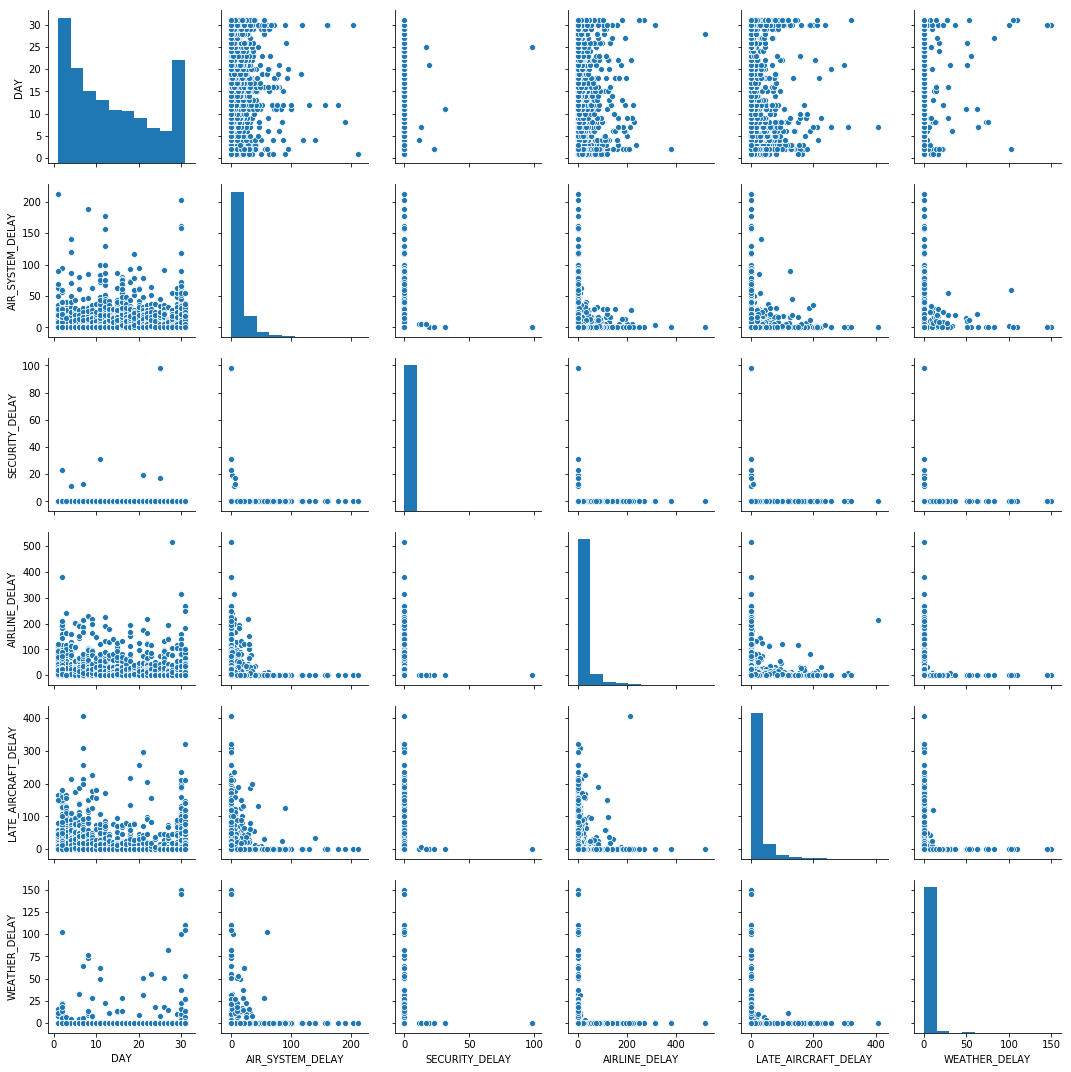

In [54]:
cols_1 = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(f11[cols])

In [55]:
f12 = F_delay_Fly_data[(Fly_data['ORIGIN_AIRPORT'] == 'ANC')]

In [56]:
f12 = f12.dropna()

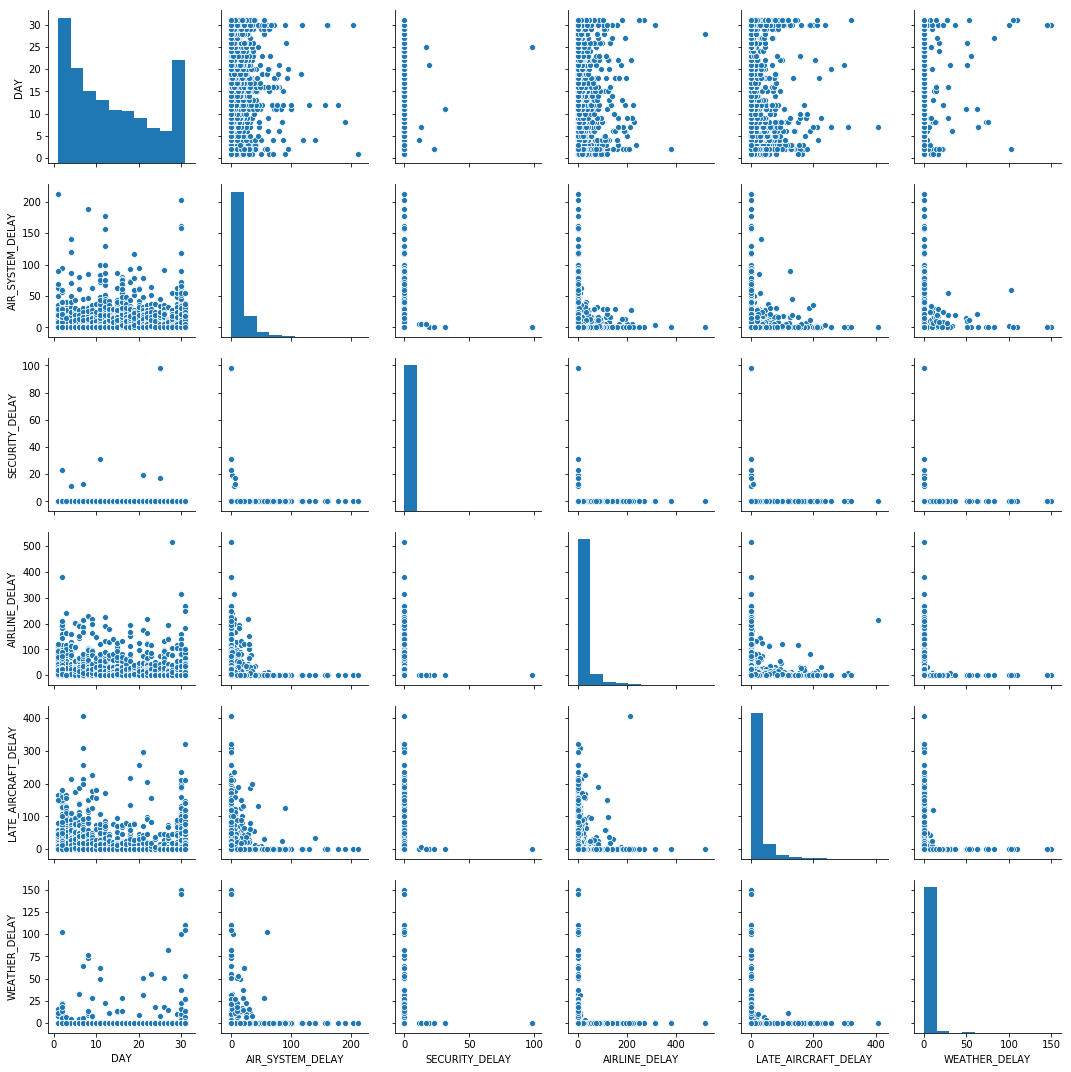

In [57]:
cols_2 = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(f11[cols])

### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию. ###

In [66]:
Fly_data['SUM_DELAY'] = Fly_data['ARRIVAL_DELAY'] + Fly_data['DEPARTURE_DELAY']

In [72]:
Sum_1 = Fly_data[['SUM_DELAY']+['AIRLINE']]

In [73]:
Sum_1 = Sum_1.dropna()

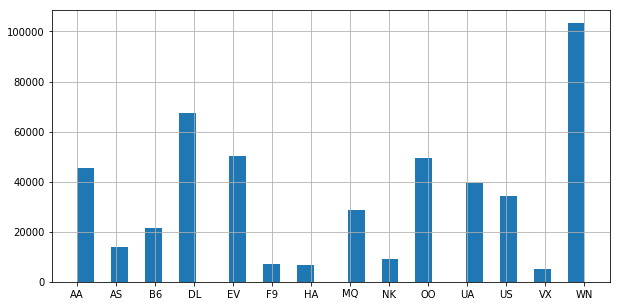

In [74]:
Sum_1.AIRLINE.hist(bins=30)